## Übung zu Praktische Optimierung, SoSe 2024
Dr. Marco Pleines
## Lösung Präsenzblatt 7

## Polynomielle Metamodelle und Bias-Variance-Tradeoff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(0)

**Betrachten Sie die Funktion $f\!: [0,5] \rightarrow \mathbb{R}$ mit $f(x) = x^2  \cos(x) + \sin(5  x)$.**

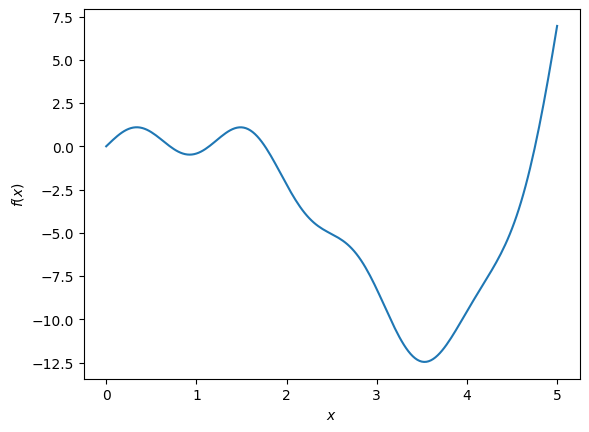

In [2]:
def true_fun(x):
    return x**2 * np.cos(x) + np.sin(5*x)

LOWER = 0
UPPER = 5

X = np.linspace(LOWER, UPPER, 201)
plt.plot(X, true_fun(X), label="True function")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

plt.show()

**Für die Funktion $f$ sollen nun polynomielle Metamodelle angepasst und verglichen werden. Dabei sei ein polynomielles Metamodell vom Grad $k$ gegeben durch 
$$p_k(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \ldots + \theta_k x^k.$$
Die Koeffizienten $\theta_0, \ldots, \theta_k$ werden anhand von Punktepaaren $(x, f(x))$ geschätzt. Wir betrachten die Grade $k = 1, \ldots, 6$.**

<!--Folgender Code ist hieran angelehnt: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py    
-->

In [3]:
def make_poly_model(f, k, n=15, lower=LOWER, upper=UPPER):
    
    samples = np.random.uniform(lower, upper, size=n)
    
    polynomial_features = PolynomialFeatures(degree=k, include_bias=True)
    linear_regression = LinearRegression()
    pipe = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipe.fit(samples.reshape(-1,1), f(samples).reshape(-1,1))

    return lambda x: pipe.predict(np.array(x).reshape(-1,1)).flatten()

pred_fun = make_poly_model(true_fun, k=5)
pred_fun(5)

array([5.19660969])

In [4]:
degrees = list(range(1,7))
NUM_OF_REPEATS = 100

pred_funcs = {}
for degree in degrees:
    pred_funcs[degree] = []
    for _ in range(NUM_OF_REPEATS):
        pred_funcs[degree].append( make_poly_model(true_fun, k=degree) )

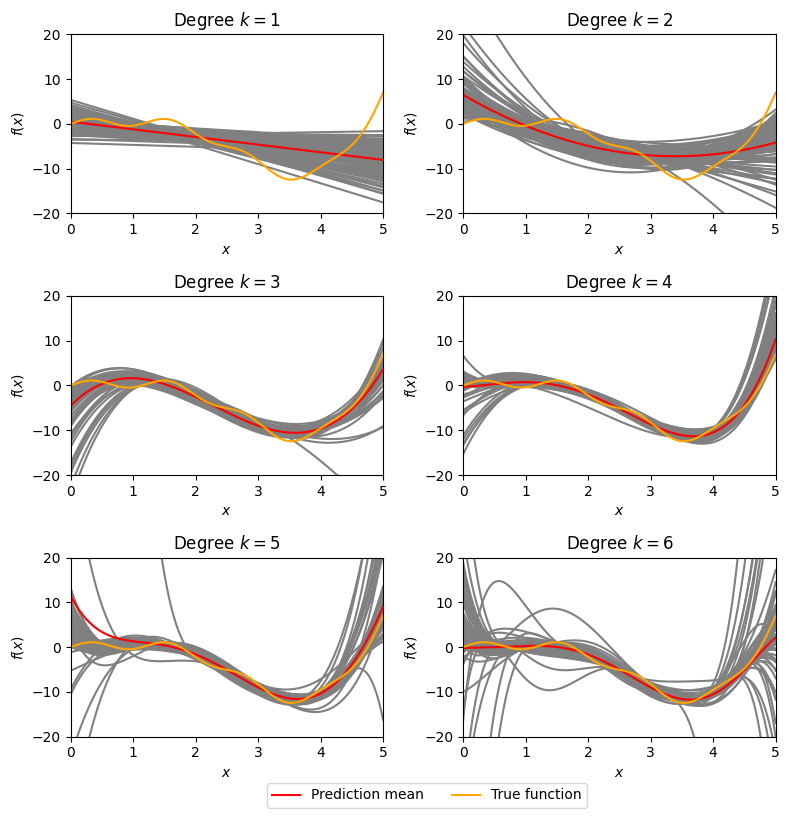

In [8]:
fig = plt.figure(figsize=(8, 8))

true_y = true_fun(X)
mean_y_k, vars_y_k = {}, {}

for degree in degrees:
    plt.subplot(3,2,degree)
    
    # plot predicted functions
    pred_y = np.zeros((len(pred_funcs[degree]),len(X)))
    for i, pred_f in enumerate(pred_funcs[degree]):
        pred_y[i] = pred_f(X)
        plt.plot(X, pred_y[i], c="gray")#, label="Predicted function")
    
    # calculate mean and variance
    mean_y_k[degree] = np.mean(pred_y, axis=0)
    vars_y_k[degree] = np.var(pred_y, axis=0)
    
    # plot mean prediction
    plt.plot(X, mean_y_k[degree], color="red", label="Prediction mean"\
                                if degree == degrees[0] else None)
    
    # plot true function
    plt.plot(X, true_y, color="orange", label="True function"\
                            if degree == degrees[0] else None)
    
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.xlim((LOWER, UPPER))
    plt.ylim((-20, 20))
    plt.title(f"Degree $k={degree}$")
    
fig.legend(loc='lower center', bbox_to_anchor=(0.54, -0.025), ncol=2)

plt.tight_layout()
plt.show()

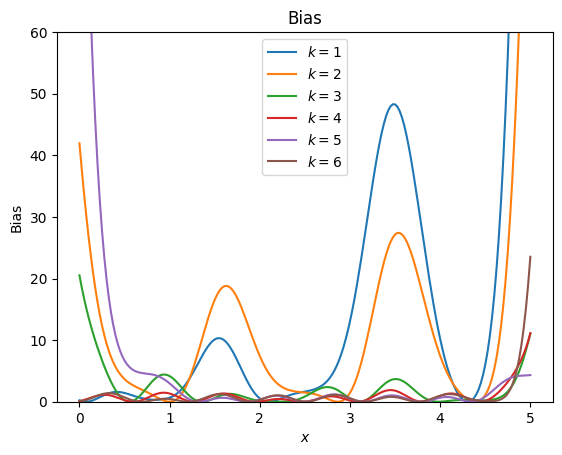

In [9]:
plt.figure()

for degree in degrees:
    # calculate and plot bias
    bias = (mean_y_k[degree] - true_y)**2
    plt.plot(X, bias, label=f"$k={degree}$")

plt.ylim(0,60)
plt.xlabel("$x$")
plt.ylabel("Bias")
plt.title("Bias")
plt.legend()

plt.show()

Der Bias wird mit höherem Grad tendenziell geringer.

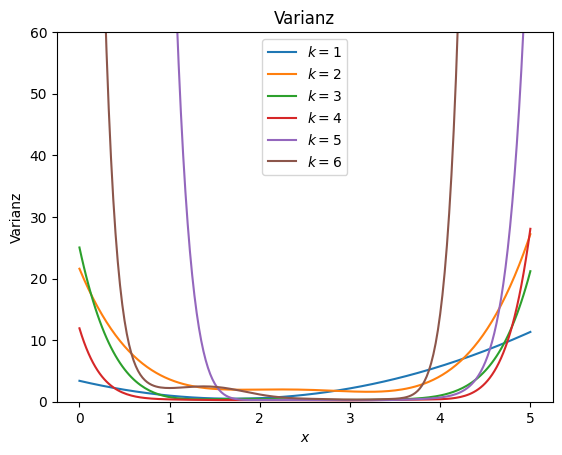

In [10]:
plt.figure()

for degree in degrees:
    # plot variance
    plt.plot(X, vars_y_k[degree], label=f"$k={degree}$")

plt.ylim(0,60)
plt.xlabel("$x$")
plt.ylabel("Varianz")
plt.title("Varianz")
plt.legend()

plt.show()

Die Varianz steigt mit höherem Grad tendenziell an.